In [22]:
# Basic Import

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading dataset
df = pd.read_csv('stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2020,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
1,1/3/2020,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,1/6/2020,58.080002,59.317501,57.817501,59.264999,59.031548,26263600
3,1/7/2020,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,1/8/2020,59.939999,60.509998,59.537498,60.095001,59.858280,27710800


## EDA-1

In [5]:
df.shape

(1092, 7)

In [6]:
# Checking Null and NA value

print("Null values:", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values: 0
NA values: False


In [8]:
# convert date field from string to Date format 
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031548,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800


In [9]:
# Total duration captured within dataset

print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2020-01-02 00:00:00
Ending date:  2024-05-03 00:00:00
Duration:  1583 days 00:00:00


In [13]:
# Monthwise comparision between Stock open and close price
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean()

# arranging order by month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
              'August','September', 'October', 'November', 'December']

monthvise = monthvise.reindex(new_order, axis=0)
print(monthvise)

                 Open       Close
Date                             
January    239.086138  239.931683
February   284.234479  285.180234
March      302.958062  303.424729
April      321.957427  320.502573
May        205.494477  206.038517
June       210.895842  211.401193
July       223.838374  224.026144
August     242.033034  242.305337
September  228.737982  227.957712
October    230.419563  230.752733
November   267.753132  268.130543
December   265.361205  264.857794


In [14]:
# Monthwise comparision between Stock open and close price

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [17]:
# Monthwise High and Low stock price

df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [20]:
# Trend comparision between stock open price, close price, high price, low price

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## EDA-2

Text(0.5, 1.0, 'Adjusted Close Price')

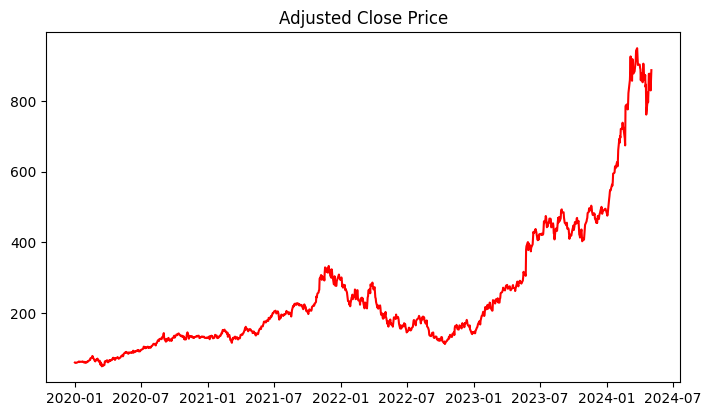

In [28]:
# Plotting adj-close price against time

fig = plt.figure(figsize = (18,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Adj Close'], color="red")
plt.title('Adjusted Close Price')

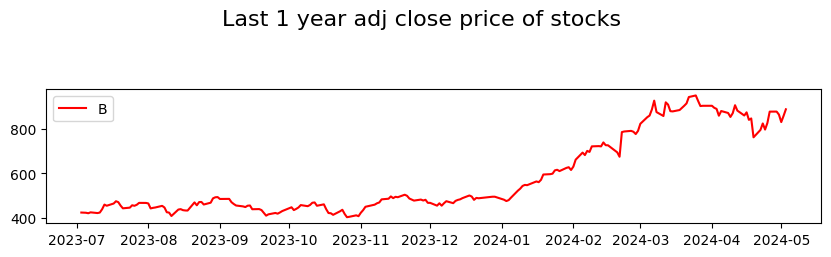

In [33]:
# Plotting only last year adjusted close price of the stocks

last1year_df = df[df['Date'] > '07-2023']

fig = plt.figure(figsize = (10,8))
fig.suptitle("Last 1 year adj close price of stocks", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_df['Date'], last1year_df['Close'], color="red")
plt.legend("B")

Text(0.5, 1.0, 'Adj Close Price')

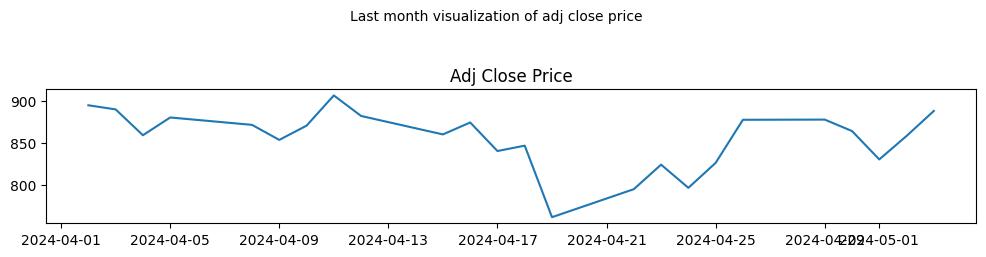

In [44]:
# Plotting last month open and close price

last1month_df = df[df['Date'] > '04-2024']

fig = plt.figure(figsize = (12,8))
fig.suptitle("Last month visualization of adj close price", fontsize=10)
fig.tight_layout()

plt.subplot(4, 1, 1)
plt.plot(last1month_df['Date'], last1month_df['Adj Close'])
plt.title("Adj Close Price")

Text(0.5, 1.0, 'Adj Close Price - 7days moving average')

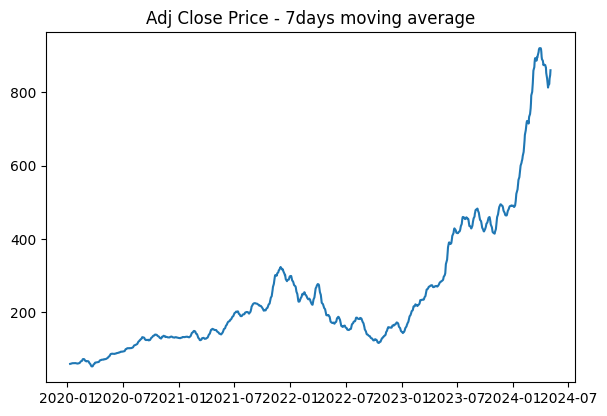

In [45]:
# Plotting 7days moving average

fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Adj Close'].rolling(7).mean())
plt.title('Adj Close Price - 7days moving average')